<a href="https://colab.research.google.com/github/kinami-takashi/M5Stack/blob/master/books/algorithm_to_data_kouzou/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第1章　アルゴリズムとは

# 第2章　計算量とオーダー記法
## 2.1　計算量とは
- 計算量の違いを「20歳以上36歳未満であることは分かっている前提の，年齢当てゲーム」を例に説明する
  - **線形探索法（linear search method）**
    - あなたは，「20歳ですか」「21歳ですか」「22歳ですか」...と順番に聞いていき，年齢を当てるまで繰り返していく方法
    - 最悪の場合，16回の質問が必要
  - **二分探索法（binary search method）**
    - 4回の質問で必ず年齢を求められる
    
|  発話者  | セリフ | 備考 |
| ---- | ---- | ---- |
|  あなた  | 28歳未満ですか | |
|  Aさん  | No | |
|あなた|32歳未満ですか|28歳以上，36歳未満（28,29,30,31,32,33,34,35）に絞れているので，その真中で区切る |
|Aさん|Yes||
|あなた|30歳未満ですか|28歳以上，32歳未満（28,29,30,31）に絞れているので，その真中で区切る |
|Aさん|No||
|あなた|31歳未満ですか|30歳以上，32歳未満（30,31）に絞れているので，その真中で区切る |
|あなた|31歳ですね||
|Aさん|正解です||


## 2.2 計算量のオーダー記法
最初に，一重のfor文と二重のfor文の計算時間を比較してみる

- 一重のfor文（$O(N)$）
  - $N$を増やしていくと，計算時間がおおむね，$N$に比例して増加していることがわかる

In [ ]:
import time 

N = 1000 # 繰り返し回数
count = 0
start = time.time()
for i in range(N):
  count += 1
  if 3600 < (time.time() - start):
    break # もしも，3600秒以上処理に時間かかったら強制終了
elapsed_time = time.time() - start

print(elapsed_time)

0.0005731582641601562


<br>  
- 二重のfor文（$O(N^2)$）  
  - $N$を増やしていくと，処理時間が$N^2$に比例して増加していくことが分かる

In [ ]:
import time 

N = 1000 # 繰り返し回数
count = 0
start = time.time()
for i in range(N):
  for j in range(N):
    count += 1
    if 3600 < (time.time() - start):
      break # もしも，3600秒以上処理に時間かかったら強制終了
elapsed_time = time.time() - start

print(elapsed_time)

0.3160874843597412


上記のそれぞれのコードの計算量は，それぞれ$O(N)$, $O(N^2)$というように呼ぶ  
この記法ランダウ（Landa）の$O$記法，または，単にオーダー記法と呼ぶ  

ランダウの$O記法$の正確な定義は，大まかにいうと以下  

---

「アルゴルズム$A$の計算時間$T(N)$がおおむね$P(N)$に比例する」ということを$T(N)=O(P(N))$であると表し，アルゴルズム$A$の計算量は$O(P(N))$であるという

---



## 2.2.4　計算量の実践的な求め方
例えば，あるアルゴリズムの計算時間$T(N)$が  
$$
T(N) = 3N^2+5N+100
$$
の場合，厳密にいうとその計算量は  
「サイズ$N$の入力に対して$3N^2+5N+100$の計算時間を要する」  
といえる．  

しかし，$N$が十分に大きいときは下式のように定数倍や低次の項の影響を受けなくなる．  
$$
\lim_{n\to ∞}\frac{3N^2+5N+100}{N^2}=3
$$
よって，$T(N)$は，おおむね$N^2$に比例すると考えることが可能．  

このことを$T(N)=O(N^2)$であると表す  

上記の手順をまとめると
1. $3N^2+5N+100$に対して，最高次の項以外を落として$3N^2$とする
2. $3N^2$の係数を無視して，$N^2$とする  

といった手順で計算量を求めることが可能


## 2.3 計算量を求める例(1)：偶数の列挙
具体的なアルゴリズムに対して計算量を求めてみる  

最初の例として，正の数$N$以下の偶数を全て出力するアルゴリズムを考える  

下記コードの計算量を評価すると，for文の反復回数は$N/2$回（小数点以下は切り下げ）となる．  

よって，計算時間はおおむね$N$に比例することから，計算量は$O(N)$と表せる


In [ ]:
import time 

N = 1000 # 繰り返し回数
start = time.time()
for i in range(0, N, 2):
  #print(i)
  pass

elapsed_time = time.time() - start
print(elapsed_time)

0.00012350082397460938


## 2.4 計算量を求める例（2）：最近点対問題
次に，やや複雑な問題として  
「2次元平面上の$N$個のうち最も距離が近い2点間の距離を求める問題」を取り上げ，それに対する全探索アルゴリズムを考える  

---
**最近点対問題**  
正の整数$N$と，$N$個の座標値$(x_i, y_i)(i=0,1,...,N-1)$が与えられた時，最も距離が近い2点間の距離を求めよ

---
この問題を，全ての点対に対して距離を計算して，そのうち最小のものを出力する方針で解いてみる

- 下記コードでは，`i == j`の時のみ，距離を比較していない．理由は，`i==j`の時は同じノードを比較することになり，最小距離`minimum_dist`が必ず0になってしまうので，それを防ぐためである
  - 試しに，33, 34行目の
    ```
        if i == j:
      continue
    ```
    をコメントアウトすると，どんな値を入力しても，0となってしまうことが分かる

- 下記コードの探索している添字の範囲は下図のオレンジ色の箇所になる  

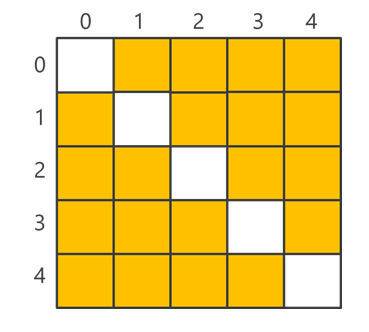

0個目のノードのx座標：0
0個目のノードのy座標：0
1個目のノードのx座標：1
1個目のノードのy座標：0
2個目のノードのx座標：0.5
2個目のノードのy座標：0.5
3個目のノードのx座標：2
3個目のノードのy座標：3
i 0 j 0
i 0 j 1
i 0 j 2
i 0 j 3
i 1 j 0
i 1 j 1
i 1 j 2
i 1 j 3
i 2 j 0
i 2 j 1
i 2 j 2
i 2 j 3
i 3 j 0
i 3 j 1
i 3 j 2
i 3 j 3
minimum_dist 0.7071067811865476
minimum_dist_nodes [0, 2]
time 0.055520057678222656


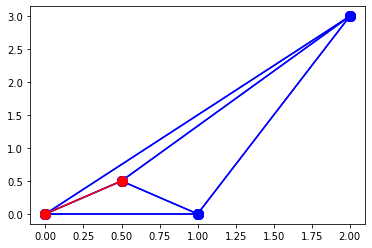

In [ ]:
import math
import time
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
%matplotlib inline

def calc_dist(x1, y1, x2, y2):
  return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))

N = 4 # 座標の数
X = [] # それぞれのノードのx座標を格納
Y = [] # それぞれのノードのy座標を格納

# 入力データを受け取る
for i in range(N):
  x = float(input(str(i)+"個目のノードのx座標："))
  y = float(input(str(i)+"個目のノードのy座標："))
  X.append(x)
  Y.append(y)

# 求める値を，十分大きい値で初期化
minimum_dist = 100000000000.0
minimum_dist_node = []

line_x = [] # matplot用
line_y = [] # matplot用


# 探索開始
start = time.time()
for i in range(N):
  for j in range(N):
    if i == j:
      continue # 同じノードは比較しない（距離が必ず）
    print("i",i,"j",j)
    # (X[i],y[i])と(X[j],Y[j])との距離
    dist_i_j = calc_dist(X[i], Y[i], X[j], Y[j])

    # matplot用（(X[i],y[i])と(X[j],Y[j])を直線で結ぶ）
    line_x.append(X[i])
    line_y.append(Y[i])
    line_x.append(X[j])
    line_y.append(Y[j])
    plt.plot(line_x, line_y, marker='.', color="blue", markersize=20)
    line_x = []
    line_y = []

    # 暫定最小値 minimum_dist を dist_i_j と比べる
    if (dist_i_j < minimum_dist):
      minimum_dist = dist_i_j # 最も距離が近い2つのノード間の距離を更新
      minimu_dist_node = [i, j] #　最も距離が近い2つのノード（i番目のノードとj番目のノード）を更新

# 最終的な最短距離を出力
print("minimum_dist", minimum_dist)
print("minimum_dist_nodes", minimu_dist_node)

elapsed_time = time.time() - start
print("time", elapsed_time)

# matplot用（最終的に，最も距離が近い2つのノードを赤色にして，赤い線で結ぶ）　　
line_x.append(X[minimu_dist_node[0]])
line_y.append(Y[minimu_dist_node[0]])
line_x.append(X[minimu_dist_node[1]])
line_y.append(Y[minimu_dist_node[1]])
plt.plot(line_x, line_y, marker='.', color="red", markersize=20)

plt.show()

<br>  
- 上記のコードでも正解を求めることができるが，下図のように$i=2, j=4$の場合と$i=4, j=2$の場合では，距離が同じになることは明示である．  

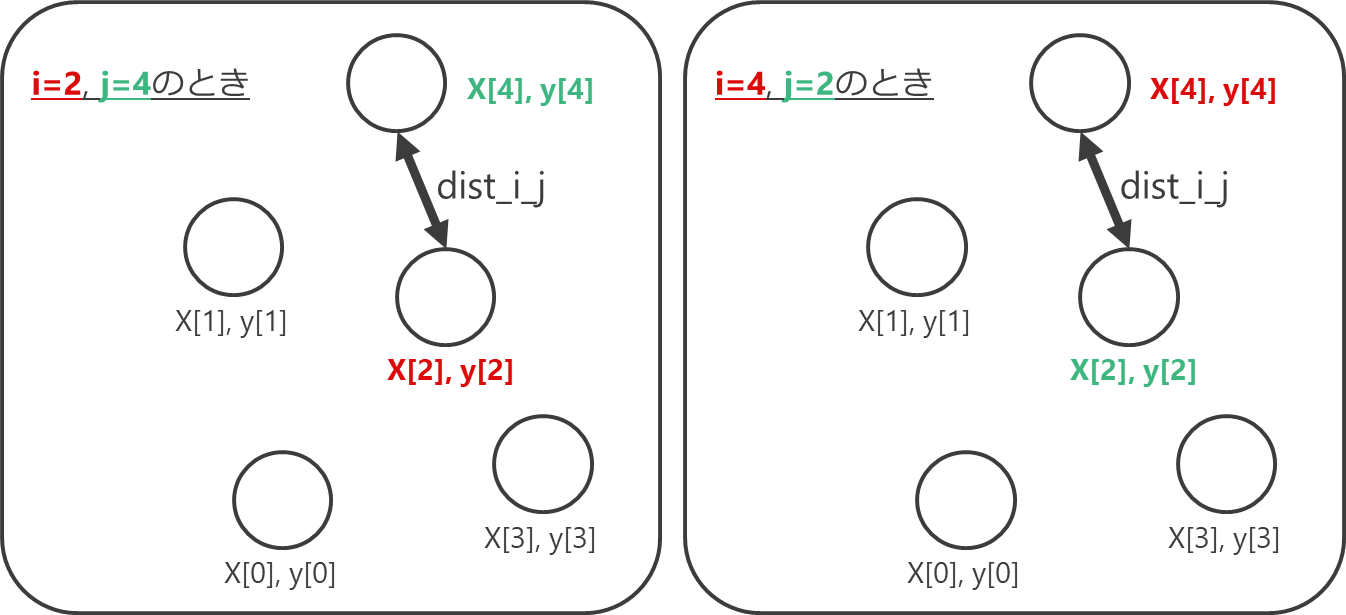

- よって，添字 $j$ が動く範囲は「0から$N-1$まで」ではなく，「 $i+1$ から $N-1$ まで」にすれば良い．  

- 添字 $j$ の動く範囲を変えた場合の「探索する添字の範囲」は下図のオレンジ色の箇所になる

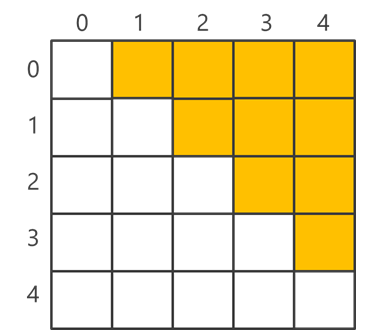  

- 下記コードを実行すると，改善前のコードと結果がおなじになることが分かる
  - しかし，探索範囲を狭めているため，処理時間が若干短縮されていることも確認できる

0個目のノードのx座標：0
0個目のノードのy座標：0
1個目のノードのx座標：1
1個目のノードのy座標：0
2個目のノードのx座標：0.5
2個目のノードのy座標：0.5
3個目のノードのx座標：2
3個目のノードのy座標：3
i 0 j 1
i 0 j 2
i 0 j 3
i 1 j 2
i 1 j 3
i 2 j 3
minimum_dist 0.7071067811865476
minimum_dist_nodes [0, 2]
time 0.04614138603210449


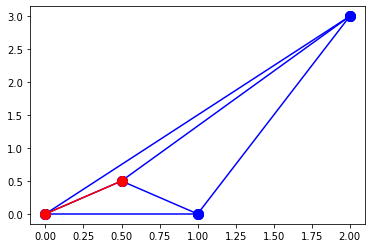

In [ ]:
import math
import time
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
%matplotlib inline

def calc_dist(x1, y1, x2, y2):
  return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))

N = 4 # 座標の数
X = [] # それぞれのノードのx座標を格納
Y = [] # それぞれのノードのy座標を格納

# 入力データを受け取る
for i in range(N):
  x = float(input(str(i)+"個目のノードのx座標："))
  y = float(input(str(i)+"個目のノードのy座標："))
  X.append(x)
  Y.append(y)

# 求める値を，十分大きい値で初期化
minimum_dist = 100000000000.0
minimum_dist_node = []

line_x = [] # matplot用
line_y = [] # matplot用


# 探索開始
start = time.time()
for i in range(N):
  for j in range(i+1, N): #変更箇所
    print("i",i,"j",j)
    # (X[i],y[i])と(X[j],Y[j])との距離
    dist_i_j = calc_dist(X[i], Y[i], X[j], Y[j])

    # matplot用（(X[i],y[i])と(X[j],Y[j])を直線で結ぶ）
    line_x.append(X[i])
    line_y.append(Y[i])
    line_x.append(X[j])
    line_y.append(Y[j])
    plt.plot(line_x, line_y, marker='.', color="blue", markersize=20)
    line_x = []
    line_y = []

    # 暫定最小値 minimum_dist を dist_i_j と比べる
    if (dist_i_j < minimum_dist):
      minimum_dist = dist_i_j # 最も距離が近い2つのノード間の距離を更新
      minimu_dist_node = [i, j] #　最も距離が近い2つのノード（i番目のノードとj番目のノード）を更新

# 最終的な最短距離を出力
print("minimum_dist", minimum_dist)
print("minimum_dist_nodes", minimu_dist_node)

elapsed_time = time.time() - start
print("time", elapsed_time)

# matplot用（最終的に，最も距離が近い2つのノードを赤色にして，赤い線で結ぶ）　　
line_x.append(X[minimu_dist_node[0]])
line_y.append(Y[minimu_dist_node[0]])
line_x.append(X[minimu_dist_node[1]])
line_y.append(Y[minimu_dist_node[1]])
plt.plot(line_x, line_y, marker='.', color="red", markersize=20)

plt.show()

- 上記のアルゴリズムの計算量を求めてみる
  - 1個目のfor文における添字 $i=0, 1, ...,N-1$ それぞれについて，2個目のfor文の反復回数を考えると次のようになる
    - $i=0$ のとき $N-1$ 回（$j=1, 2, ..., N-1$） 
    - $i=1$ のとき $N-2$ 回（$j=2, 2, ..., N-1$） 
    - ...
    - $i = N-2$ のとき $1$ 回（$j=N-1$） 
    - $i = N-1$ のとき $0$ 回 
  - よって，for文の反復回数$T(N)$は  
  $$
  T(N) = (N-1)+(N-2)+...+1+0=\frac{1}{2}N^2-\frac{1}{2}N
  $$
  となる．
    - これは，$N$個のものから2個選ぶ組み合わせの数が${}_N C_2=\frac{1}{2}N(N-1)$であること（組み合わせの公式より）からも分かる
- ここで， $T(N)=\frac{1}{2}N^2-\frac{1}{2}N$ の最高次以外の項を無視すると， $\frac{1}{2}N^2$ となり，さらに最高次の係数も無視すると$N^2$になるので，このアルゴリズムの計算量は$O(N^2)$と表せる

- なお，この最近点対問題に対しては，**分割統治法（divide-and-conquer method）**に基づく計算量$O(N\log N)$のアルゴリズムも知られている
  - 詳細は割愛．詳しくはブックガイド[5]の「分割統治法」の章を参照（分割統治法そのものは，4.6章，12,4章で簡単に説明する）

---

## 2.5 計算量の使い方
各オーダーの計算量をもつアルゴリズムについて，入力サイズ$N$に応じた計算ステップ回数の変化の様子を下表に示す（$10^9$以上の値となる部分については「-」と記載）  

|$N$|$\log N$|$N\log N$|$N^2$|$N^3$|$2^N$|$N!$|
|----|----|----|----|----|----|----|
|5|2|12|25|130|30|120|
|10|3|33|100|1,000|1,024|3,628,800|
|15|4|59|225|3,375|32,768|-|
|20|4|86|400|8,000|1,048,576|-|
|25|5|116|625|15,625|-|-|
|30|5|147|900|27,000|-|-|
|100|7|664|10,000|1,000,000|-|-|
|300|8|2,468|90,000|27,000,000|-|-|
|1,000|10|9,966|1,000,000|-|-|-|
|10,000|13|132,877|100,000,000|-|-|-|
|100,000|17|1,660,964|-|-|-|-|
|1,000,000|20|19,931,568|-|-|-|-|
|10,000,000|23|232,534,967|-|-|-|-|
|100,000,000|27|-|-|-|-|-|
|1,000,000,000(-)|30|-|-|-|-|-|
  
ここで，対数logの底は2とする．ただし， $a>1$ となる実数 $a$ に対して，底の変換硬式より  
$$
\log_{a}N = \frac{\log_{2}N}{\log_{2}a}
$$
が成立することから，底を変更しても定数倍の違いしか生じないことから，計算量のオーダー記法においては，底の違いは無視可能  


---

- 計算量を考えるときの注意点として「**入力データをすべて読み込むだけでも$O(N)$の計算量（およびメモリ容量）**」を要することに注意が必要
  - $10^9$を超えるような極めてサイズの大きい問題を扱う時は全データを読み込むのではなく，必要なデータのみを読み取って処理を始める仕組みが用いられることが多い

---
- 上表から，$O(\log N)$のアルゴリズムは大変高速であると分かる
- 逆に，$O(N!)$は非常に早い段階で$10^9$を超えていることも分かる
  - $O(N!)$ や $O(2^N)$ といったオーダの計算量を要するアルゴリズムは**指数時間（expotential time）**であるという
  - 逆に，定数 $d>0$ が存在して計算量が $N^d$ の定数倍によって上から抑えられる時 **多項式時間（polunomial time）**であるという

---
- $O(N^2)$ は $O(2^N)$ などの指数時間アルゴリズムに比べると，比較的大きい $N$ に対しても，現実的な計算時間で動作するが， $N>10^5$ の領域まで行くと処理に膨大な時間がかかる 
- 一方，$O(N\log N)$はとても大きな$N$に対しても，現実的な計算時間で動作する

- 現実世界では $O(N\log N)$ と $O(N^2)$ との違いが決定的に重要となる場面は数多くある  
  - 例：$10^6$ のデータに対して， $O(N^2)$ の計算量では，標準的なコンピュータで30分程度の計算時間を要するが， $O(N\log N)$ の計算量ではわずか3ミリ秒程度で計算を終えることが可能
    - $O(N^2)$のアルゴリズムを $O(N \log N)$へ改善できる例として，12章でソートについて解説する

--- 

- 計算量には $O(1)$ という計算量も登場する
  - これは，問題の大きさに依存しない定数時間以内に処理が終了することを意味しており，このような計算量は**定数時間（constant time）**であるという
  - データを雑に扱ってしまった結果 $O(N)$ となってしまい，処理時間が非常に遅くなってしまうことがある
  - 以下のPythonの例ではサイズが $10^5-10^7$ のlist型の変数 $S$ を用いている時に
  ```
  if v in S:
    処理
  ``` 
  と実装すると`v`が`S`に含まれるかどうかの判定に， $O(N)$ の時間がかかってしまう  <br>  
  この問題を解決するために，8章で解説する**ハッシュテーブル（hash table）**を用いる方法が有効となる．  
  Pythonではlist型の代わりに，set型やdict型を用いるとよい．例として`S`をset型の変数として
  ```
  if v in S:
    処理
  ```
  というように実装すれば，`v`が`S`に含まれているかどうかの判定に要する計算量が（平均的に） $O(1)$ となる．

---


## 2.6 計算量に関する注釈

### 2.6.1 時間計算量と領域計算量
これまでに，議論した計算量はすべてアルゴリズムの計算時間に関するものだった．  
その旨を強調したい場合には，特に**時間計算量（time complexity）**と呼ぶ．  

一方で，アルゴリズム実行時のメモリ使用量を表す**領域計算量（space complexity）**という概念も存在する

### 2.6.2 最悪時間計算量と平均時間計算量
アルゴリズムの計算時間は，入力データの偏りによって変動することがある．その中で，最悪ケースにおける時間計算量を**最悪時間計算量（worst case time complexity）**とよぶ．
<br>  
平均的なケースにおける時間計算量を**平均時間計算量（average time complexity）**と呼ぶ．  
ここで平均時間計算量とは，正確には，入力データにある分布を仮定したときの，時間計算量の期待値を指す．12.5節で登場する**クイックソート（quick sort）**のように，平均的には高速だが最悪時には遅いアルゴリズムもある．
<br>  
以降，単に計算量という場合，最悪時間計算量を指すこととする



# 3章　設計技法（1）　全探索
**全探索**は，解きたい問題に対して，考えられる可能性を全て調べ上げることによって解決する手法．  

高速なアルゴリズムを設計する場合でも，その初期段階として，力任せの全探索手法を考えることが有効になることがある

## 3.2 全探索（1）：線形探索法
最初に，最も簡単で一般的な「多量のデータの中から特定のデータを探し出す」という問題を扱う．  

---
**基本的な探索問題**  
$N$個の整数 $a_0, a_1, ..., a_{n-1}$ と整数値 $v$ が与えられた時， $a_i=v$ となるデータが存在するかどうかを判定する

---
上記の問題に対する素朴なアプローチとして，**線形探索法（linear search method）**を説明する．  
<br>  
線形探索法「1つ1つの要素を順に調べていく」という探索法である．例えば，下図は数列 $a=(4, 3, 12, 7, 11)$ の中に値 $v=7$ が含まれるかどうかを，線形探索法を用いて判定する手続きを表している  

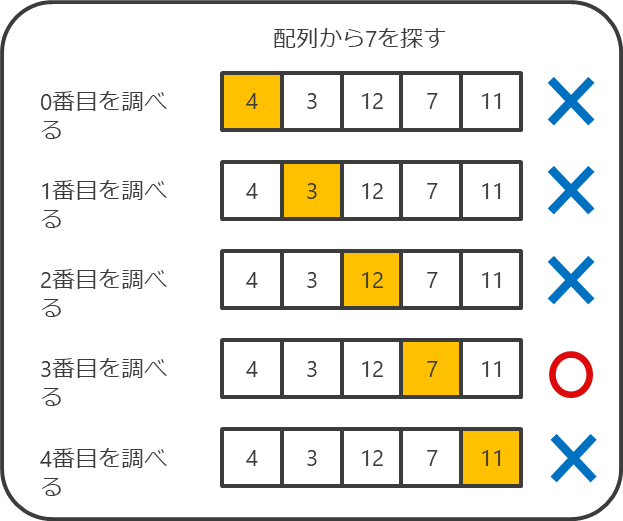

In [ ]:
import time

N = 4 # 入力する整数の数
a = [] # N個の整数値を格納する配列
v = int(input("探したい整数を入力："))
for i in range(N):
  temp = int(input("探索対象の配列aに"+str(i)+"個目の整数を追加："))
  a.append(temp)

exit = False # 整数vが発見できたかどうかのflag

start = time.time()
for i in range(N):
  if a[i] == v:
    exit = True # 見つかったらflagを立てる
elapsed_time = time.time() - start
print("time", elapsed_time)

if exit == True:
  print("found 'v' !!!!!")
else:
  print("not found 'v'")

探したい整数を入力：0
探索対象の配列aに0個目の整数を追加：0
探索対象の配列aに1個目の整数を追加：1
探索対象の配列aに2個目の整数を追加：2
探索対象の配列aに3個目の整数を追加：3
time 6.937980651855469e-05
found 'v' !!!!!


ここで，このアルゴリズムの計算量は $N$ 個の値を順に調べているので $O(N)$ となる．
<br>  
なお，ここで上記のコードに「探索中に`v`が見つかったら探索を打ち切って`break`する」という工夫が考えられる．**しかし，この工夫を施しても，計算量のオーダーと言う意味でのアルゴリズムの良さ（最悪時間計算量）**は変わらない．
- アルゴリズムでは一般的に，最悪のケースにおける計算時間を考慮する

## 3.3 線形探索法の応用

### 3.3.1 条件を満たすものがある場所も知る

以前までは，$a_i=v$を満たすデータが存在するかどうかのみを判定していた．
<br>  
ここでは，発展形として$a_i=v$を満たす添字$i$を具体的に求める  

具体的には，下記コードのように条件を見つける添字`i`を見つけたときに，それを`found_id`という変数に格納することで実現できる．  

ここで，`found_id`の初期値には，ありえない値として`found_id=-1`を設定する．  
また，探索終了時に`found_id==-1`となっていた場合，数列の中に条件を満たすものが存在しないことも確認可能

In [ ]:
import time

N = 4 # 入力する整数の数
a = [] # N個の整数値を格納する配列
v = int(input("探したい整数を入力："))
for i in range(N):
  temp = int(input("探索対象の配列aに"+str(i)+"個目の整数を追加："))
  a.append(temp)

found_id = -1 # 初期値は-1などのありえない値を設定
start = time.time()
for i in range(N):
  if a[i] == v:
    found_id = i # 見つかったらflagを立てる
    break # ループを抜ける

elapsed_time = time.time() - start
print("time", elapsed_time)

print("found_id：", found_id)

探したい整数を入力：0
探索対象の配列aに0個目の整数を追加：1
探索対象の配列aに1個目の整数を追加：2
探索対象の配列aに2個目の整数を追加：3
探索対象の配列aに3個目の整数を追加：4
time 0.00010061264038085938
found_id： -1


### 3.3.2 最小値を求める
次の応用として「最小値を求める」ように改変する．  

これを実現するにはfor文内で，`min_value`という変数に，「これまでで最も小さい値」を保持するようにすれば良い．  
具体的には，`min_value`よりも小さな値`a[i]`が来たら，`min_value`の値を更新する．  

`min_value`の初期値としては，無限大を表す`INF`を設定する，また，下記コードの場合，`a[i]`の値は20000000未満であることが保証されているものとする

In [ ]:
import time

INF = 20000000 # 十分に大きい値に

N = 4 # 入力する整数の数
a = [] # N個の整数値を格納する配列
for i in range(N):
  temp = int(input("探索対象の配列aに"+str(i)+"個目の整数を追加："))
  a.append(temp)

start = time.time()
min_value = INF
for i in range(N):
  if a[i] < min_value:
    min_value = a[i]
elapsed_time = time.time() - start
print("time", elapsed_time)

print("min_value is ", min_value)

探索対象の配列aに0個目の整数を追加：8
探索対象の配列aに1個目の整数を追加：5
探索対象の配列aに2個目の整数を追加：9
探索対象の配列aに3個目の整数を追加：2
time 0.00011372566223144531
min_value is  2


## 3.4 ペアの全探索
前節まででは「与えられたデータの中から特定の物を探す」という最も基本的な探索問題だった．
<br>  
今回は発展した内容として
- 与えられたデータの中から最適なペアを探索する問題
- 与えられた2組のデータの中からそれぞれ要素を抜き出す方法を最適化する問題
を解く  

このような問題は，二重のfor文を用いることで解くことができる．2.7章で登場した「最近点対問題」は，まさに前者の例となっている．
<br>  
ここでは，後者の例として以下の問題を考える

---
**ペア和の$K$以上の中での最小値**  
$N$個の整数$a_0,a_1,...,a_{N-1}$と$b_0,b_1,...,b_{N-1}$が与えられる．2組の整数列からそれぞれ1個ずつ整数を選んで和を取る．その和として考えられる値のうち，整数$K$以上の範囲内での最小値を求めよ

---
例として，$N=3, K=10, a=(8, 5, 4), b=(4, 1, 9)$のとき，$a$から8，$b$から4を選んで8+4=12とすると最小になる．  

この問題では
- $a_0, ..., a_{N-1}$ から $a_i$ を選ぶ（$i=0, ..., N-1$）
- $b_0, ..., b_{N-1}$ から $b_j$ を選ぶ（$j=0, ..., N-1$）
という方法を全て調べあげることで，解くことが可能．この場合，考えられる場合の数は$N^2$通りになるため，計算量は$O(N^2)$になる．
 
なお，この問題は二分探索法を用いることで$O(N\log N)$で解くことも可能．詳細は6.6節


In [ ]:
import time

INF = 20000000 # 十分に大きい値に

N = 3 # 探索する整数の配列の長さ
K = 10 # いくつ以上の範囲内にするか 
a = [] # 探索する配列1
b = [] # 探索する配列2
for i in range(N):
  temp = int(input("探索対象の配列aに"+str(i)+"個目の整数を追加："))
  a.append(temp)
  temp = int(input("探索対象の配列bに"+str(i)+"個目の整数を追加："))
  b.append(temp)

start = time.time()
min_value = INF
for i in range(N):
  for j in range(N):

    # 和がK未満の場合は捨てる
    if (a[i] + b[j] < K):
      continue
    
    # 最小値更新
    if (a[i] + b[j] < min_value):
      min_value = a[i] + b[j]

elapsed_time = time.time() - start
print("time", elapsed_time)

print("result is ", min_value)

探索対象の配列aに0個目の整数を追加：8
探索対象の配列bに0個目の整数を追加：4
探索対象の配列aに1個目の整数を追加：5
探索対象の配列bに1個目の整数を追加：1
探索対象の配列aに2個目の整数を追加：4
探索対象の配列bに2個目の整数を追加：9
time 0.0002455711364746094
result is  12


# 3.5 全探索（3）：組み合わせの全探索
本格的な問題として，以下の問題を考えてみる  

---
**部分和問題**  
$N$個の正の整数 $a_0, a_1, ..., a_{N-1}\}$ と正の整数 $W$ が与えられる． $a_0, a_1, ..., a_{N-1}$ の中から何個かの整数を選んで総和を $W$ をすることができるかどうかを判定せよ

---
例えば，$N=5$, $W=10$, $a=\{1,2,4,5,11\}$の場合には，$a_0+a_2+a_3=1+4+5=10$ となり "Yes" となる．  

一方で， $N=4, W=10, a=\{1,5,8,11\}$ の場合，$a$ からどのように抜き出しても総和を10にできないため"No"となる．
<br>  
$N$個の整数からなる集合の部分集合は$2^N$通りある．  
例えば $N=3$ の場合には，$\{a_0,a_1,a_2\}$ の部分集合は，$\emptyset, \{a_0\},\{a_1\},\{a_2\},\{a_0,a_1\},\{a_1,a_2\},\{a_0,a_2\},\{a_0,a_1,a_2\}$ の8通りが存在する．これらを全探索する方法を考える
<br>  
ここでは，整数の二進法表現とビット演算を用いる方法を紹介する．また，より汎用的な全探索方法として**再帰関数（recursive function）**を用いる方法は4.5節で説明する．再帰関数を用いた全探索手法は，5章で解説する動的計画法にも繋がり，大変重要となる
<br>  
整数の二進法表現では，$N$個の要素からなる$\{a_0,a_1, ..., a_{N-1}$ の部分集合は，整数の二進法表現を用いることで，二進法で$N$ 桁以下の値に対応付けることが可能  

例えば，$N=8$ として $\{a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7\}$ の部分集合は $\{a_0,a_2,a_3,a_6\}$ は二進法表現の整数値01001101（0桁目，2桁目，3桁目，6桁目が1）に対応付けることが可能  

また，二進法表現で $N$ 桁以下となる整数は，通常の十進法で表すと0以上$2^N$ 未満の値となる．  
$N=3$ の場合は，下記表となる  

|部分集合ーー|二進法での値|十進法での値|
|----|----|----|
|$\emptyset$|000|0|
|$\{a_0\}$|001|1|
|$\{a_1\}$|010|2|
|$\{a_0, a_1\}$|011|3|
|$\{a_2\}$|100|4|
|$\{a_0,a_2\}$|101|5|
|$\{a_1,a_2\}$|110|6|
|$\{a_0,a_1,a_2\}$|111|7|




ここで，部分和問題に戻る  

部分和問題は $\{a_0,a_1,...,a_{N-1}\}$ の部分集合として考えられる $2^N$ 通りのものをすべて調べあげることによって解くことが可能．  
これらの部分集合は0以上 $2^N$ 未満の整数値ち対応することができた．

次に，0以上 $2^N$ 未満の整数値`bit`が与えられたときに，それに対応する部分集合を復元する方法を考える．  

方針としては，各 $i=0,1,...,N-1$ に対して整数`bit`の表す部分集合に $i$ 番目の要素 $a_i$ が含まれるかどうかを判定することとする．  

そのためには，整数`bit`を二進法表現したときに，`bit`の $i$ 桁目が1になっているかどうかを判定する．  

これは下記コードのように判定可能  
- ここで`1 << i`は $2^i$ に対応することに注意

```
# bit の表す部分集合に i 番目の要素が含まれる場合
if (bit and (1 << i)):
  # 含まれる場合の処理
else:
  # 含まれない場合の処理
```
<br>  
例えば，$N=8$ として部分集合 $\{a_0,a_2,a_3,a_6\}$ に対応する整数`bit=01001101`を考える．  

この時， $i=0,1,...,N-1$ に対して，`bit & (1 << i)`の値を求めると下表になる．  
  
すなわち，上記コードは「整数`bit`で表される部分集合に `i`番目の要素が含まれているかどうかを判定できる」ということになる  

|$i$|1<<$i$|bit$\&$(1<<$i$)|
|----|----|----|
|0|00000001|01001101 $\&$ 00000001 = 00000001(true)|
|1|00000010|01001101 $\&$ 00000010 = 00000000(false)|
|2|00000100|01001101 $\&$ 00000100 = 00000100(true)|
|3|00001000|01001101 $\&$ 00001000 = 00001000(true)|
|4|00010000|01001101 $\&$ 00010000 = 00000000(false)|
|5|00100000|01001101 $\&$ 00100000 = 00000000(false)|
|6|00100000|01001101 $\&$ 01000000 = 01000000(true)|
|7|00100000|01001101 $\&$ 10000000 = 00000000(false)|


<br>  
以上のことを踏まえると，部分和問題に対する全探索開放は下記コードのように実装可能
- `1 << N`は $2^N$にあたる
  - 例：N=5
    <br>  
    10進数の`1`は2進数で示すと`00000001`になるため，  
    `1 << 5`の場合は，`00000001`を左に5つ動かすことになり，`00100000`になる．
    <br>  
    これを10進数にすると 
$(2^8*0) +(2^7*0) +(2^6*0) +(2^5*1) + (2^4*0) + (2^3*0) + (2^2*0) + (2^1*0) + (2^0*0) = 32$
<br>  
よって，`(1 << N)`は $2^5=32$ ということになる

In [ ]:
import time

N = 2 # 探索する整数の配列の長さ
W = 10 #  配列内のいずれかの数値を足した時に，Wに一致するかどうか
a = [] # 探索する配列
for i in range(N):
  temp = int(input("探索対象の配列aに"+str(i)+"個目の整数を追加："))
  a.append(temp)

start = time.time()

# bit は 2^N 通りの部分集合全体を動く
exist = False
bit = 0
while bit < (1 << N):
  bit += 1
  sum = 0 # 部分集合に含まれる要素の和
  print(bit)
  for i in range(N):
    
    # i番目の要素 a[i]が部分集合に含まれているかどうか
    if bit & (1 << i):
      sum += a[i]
   
  # sumがWと一致するかどうか
  if sum == W:
    exist = True

elapsed_time = time.time() - start
print("time", elapsed_time)

if exist == True:
  print("Yes")
else:
  print("No")
# W=10 a={1,5,8,11} no
# W=10 a={1,2,4,5, 11} yes

探索対象の配列aに0個目の整数を追加：9
探索対象の配列aに1個目の整数を追加：1
1
2
3
4
time 0.0017554759979248047
Yes


上記コードの具体的な例として`a=[9,1], N=2, W=10`の時の処理の流れを下図に示す

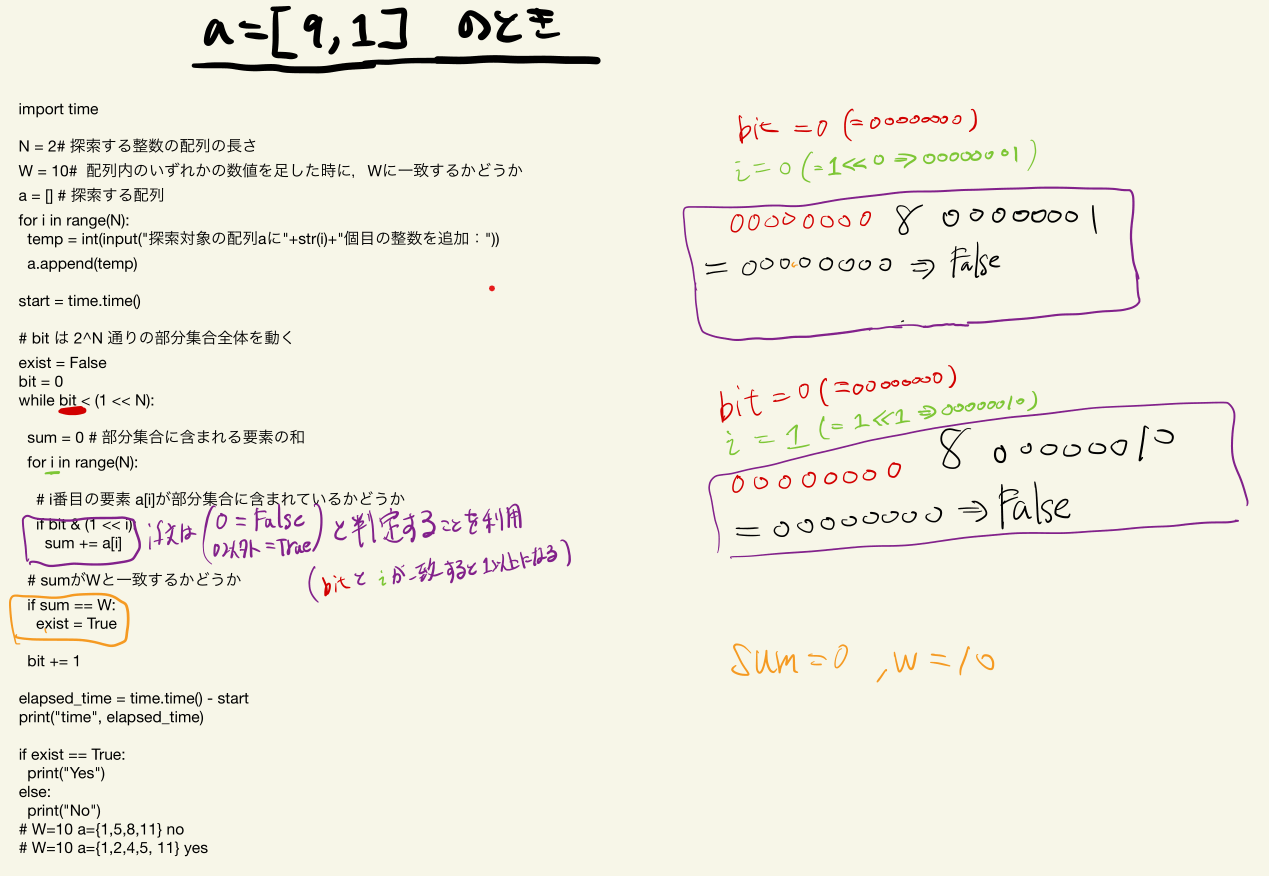

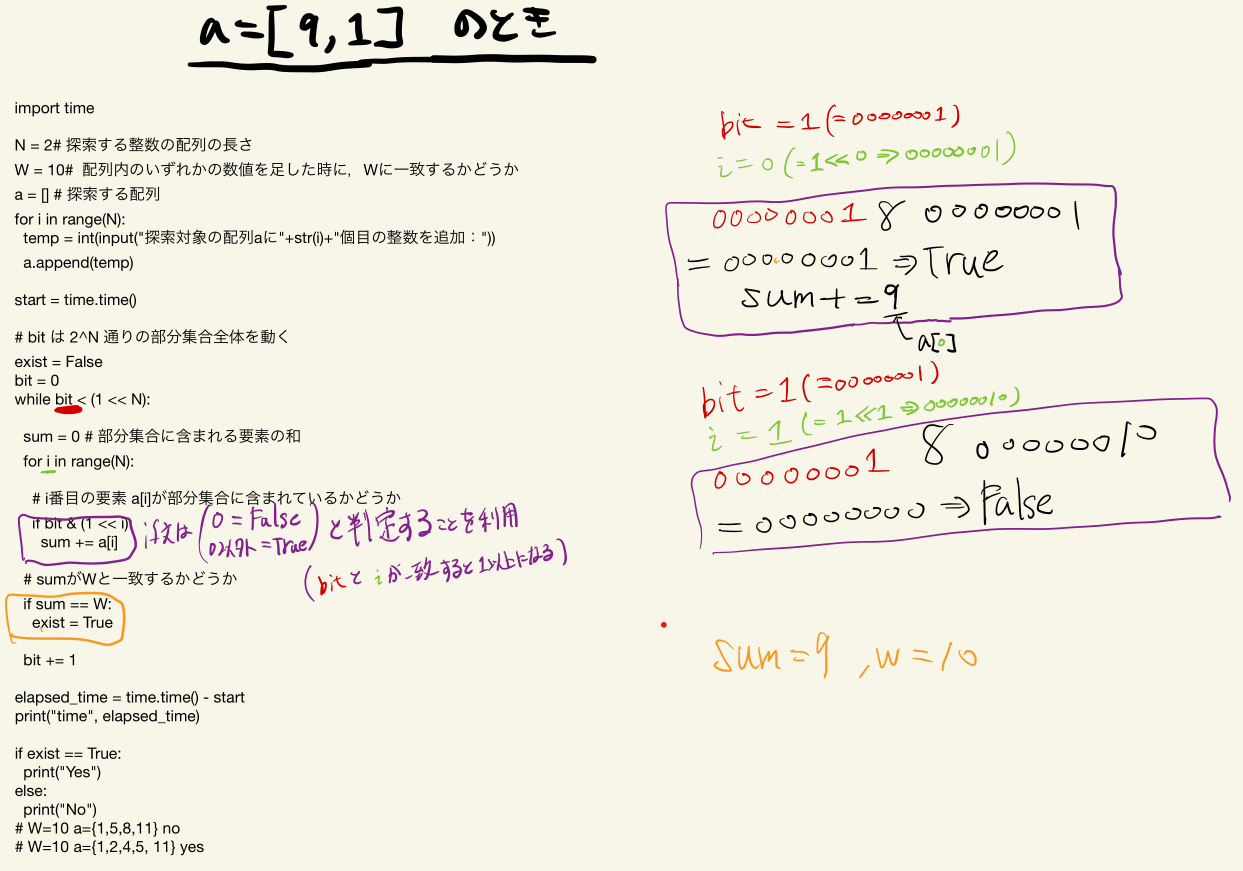

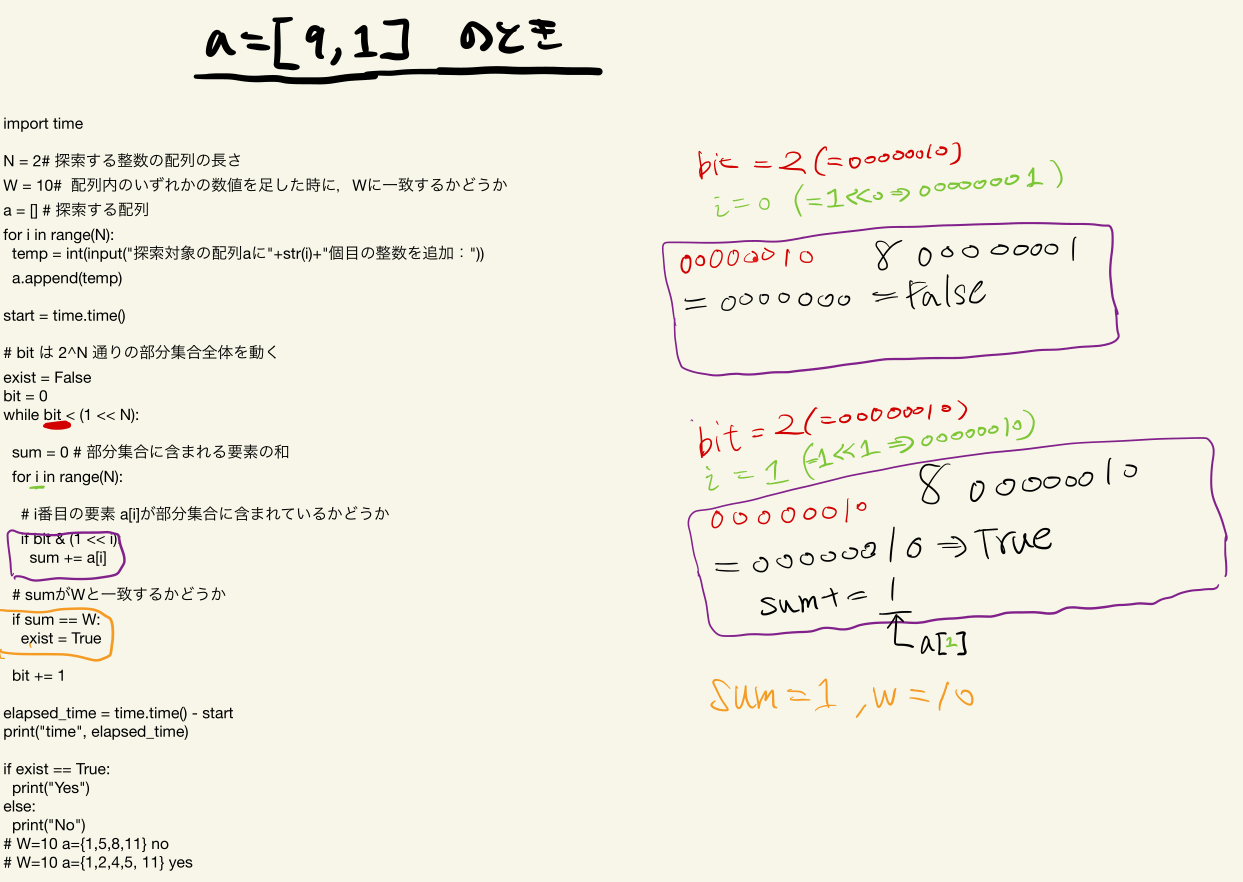

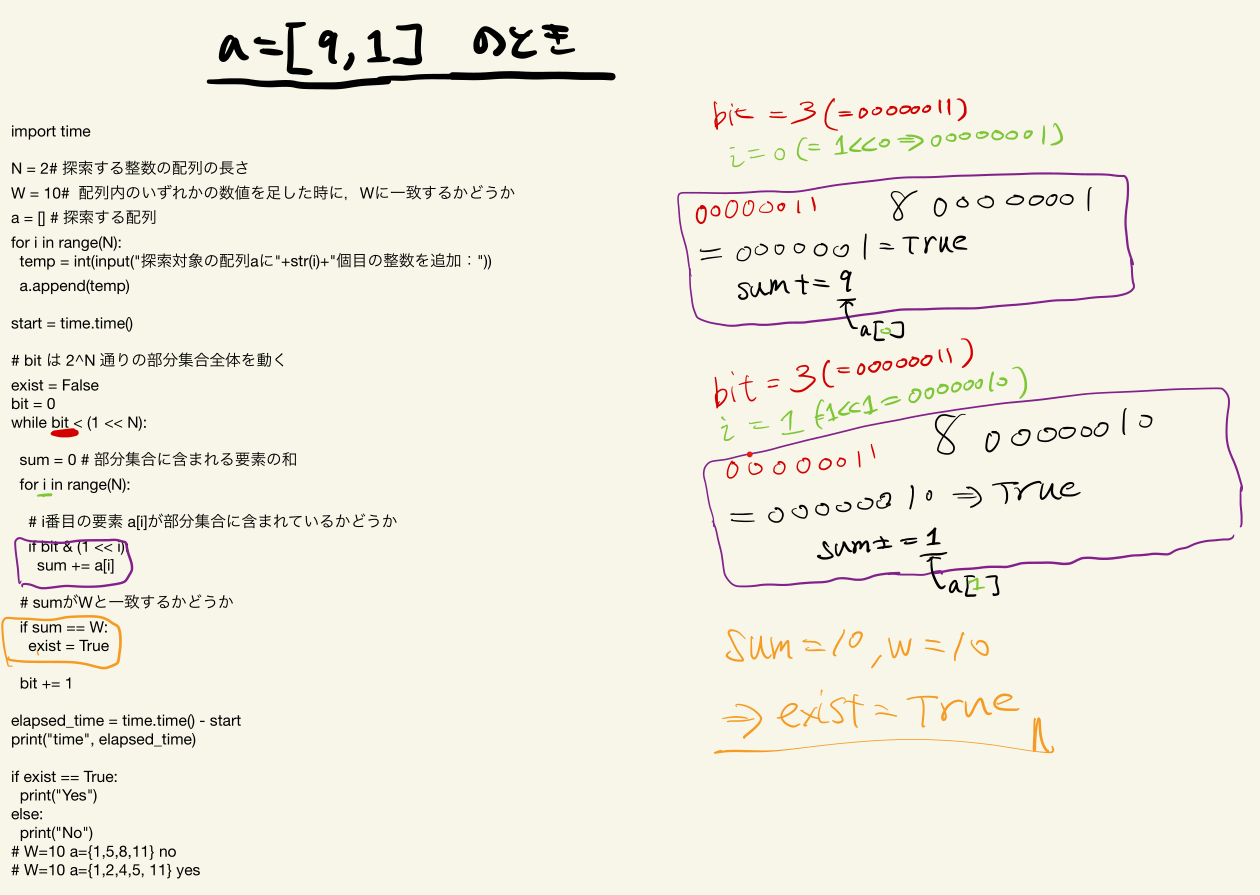

# 第4章　設計技法（2）：再帰と分割統治法


## 4.1 再帰とは
手続きの中で自分自身を呼び出すことを**再帰呼び出し（recursive call）**という．また，再帰呼び出しを行う関数のことを**再帰関数（recursive function）**という．
<br>  
最初に，再帰関数の簡単な例を下記コードに示す  
- 下記コードは関数`func`の内部で`func`を呼び出すことで，1から $N$ までの総和1+2+...+ $N$ を計算する関数となっている

In [ ]:
def func(N):
  if N == 0:
    return 0
  return N + func(N-1)

N = 5
sum = func(N)
print(sum)

15


上記コードの再帰関数`func`に対して，具体的に`func(5)`を呼び出した時の挙動を下図に示す  

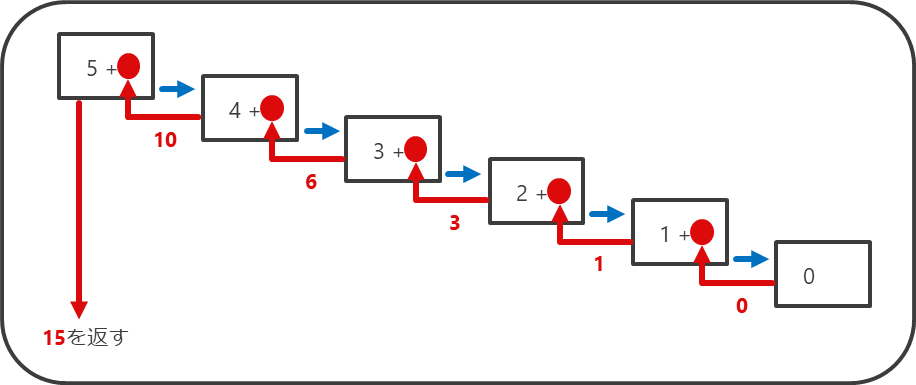  

上記図をまとめると，  
0. func(0)は0を返し
1. func(1)は 1 + func(0) = 1 を返し
2. func(2)は 2 + func(1) = 2 + 1 = 3 を返し
3. func(3)は 3 + func(2) = 3 + 2 + 1 = 6 を返し
4. func(4)は 4 + func(3) = 4 + 3 + 2 + 1 = 10 を返し
5. func(5)は 5 + func(4) = 5 + 4 + 3 + 2 + 1 = 15 を返す  

ここで，最初に呼び出されるのは`func(5)`だが，**最初に値を返すのは`func(0)`である**ことに注意．  

上記を確認するために，下記コードを実行してみる

In [ ]:
def func(N):
  print("func(",N,")を呼び出しました．")
  if N == 0:
    return 0

  # 再帰的に答えを求めて出力する
  result = N + func(N - 1)
  print(N, "までの和　＝　", result)

  return result

N = 5
sum = func(N)
print(sum)

func( 5 )を呼び出しました．
func( 4 )を呼び出しました．
func( 3 )を呼び出しました．
func( 2 )を呼び出しました．
func( 1 )を呼び出しました．
func( 0 )を呼び出しました．
1 までの和　＝　 1
2 までの和　＝　 3
3 までの和　＝　 6
4 までの和　＝　 10
5 までの和　＝　 15
15


<br>  
ここで，再帰関数の構成要素について整理すると以下のようになる．  

ここで，「ベースケース」とは再帰関数の中で，再帰呼び出しを行わずにreturnするケースとなる

---
**再帰関数のテンプレート(python)**  
```
def func(引数):
  if (ベースケース):
    return ベースケースに対する値
  
  # 再帰呼び出しを行う
  func(次の引数)
  return 答え

```
---

再帰関数においては，「ベースケースに対する処理」が非常に重要になり，これを行わないと再帰呼び出しを無限に繰り返すことになるので注意する必要がある
<br>  
また，再帰呼び出しを行ったときの引数が，ベースケースに近づくようにすることも非常に重要．  

下記コードのようにしてしまうと，例えば`func(5)`を呼び出した時の引数が6,7,8,...と延々に増えてしまうことになる  

```
func (N):
  if N == 0:
    return 0
  return N + func(N+1)


## 4.2 再帰の例（1）：ユークリッドの互除法
